I am going to clean and join the data from part 1 and part 2 and then merge the two dataframes.

In [76]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
import sqlite3

city_bikes_df = pd.read_csv('../data/city_bikes_per_city_barcelona')
yelp_df = pd.read_csv('../data/yelp_results_barcelona')

In [77]:
city_bikes_df

city country  longitude   latitude  free_bikes  empty_slots
0    Barcelona      ES   2.162255  41.405520           6           10
1    Barcelona      ES   2.182508  41.396717          32            4
2    Barcelona      ES   2.169427  41.386543          11           16
3    Barcelona      ES   2.150807  41.384810          14           10
4    Barcelona      ES   2.204141  41.399217          24            1
..         ...     ...        ...        ...         ...          ...
509  Barcelona      ES   2.144083  41.398573           7           17
510  Barcelona      ES   2.187813  41.370248           1           27
511  Barcelona      ES   2.216209  41.405365          17           11
512  Barcelona      ES   2.152180  41.385400          10           16
513  Barcelona      ES   2.205380  41.401708          16           11

[514 rows x 6 columns]

In [78]:
yelp_df

id  \
0     peGMNEAPUxOR4Trg15eVdA   
1     0_UULyMycCwHIqK0avhvxg   
2     C65Z0hoJWndFHilQx6RxXw   
3     Ldwla3RbG0qq4UW4yVZm6w   
4     60GlRETCW6AXCS6d4gWQUA   
...                      ...   
1956  q76Gm87sn4-tM0LDcA72mA   
1957  nmkQ1DebRdHrl1R3A629Wg   
1958  jjtoB00GRSXRgdpW9PnxuQ   
1959  q76Gm87sn4-tM0LDcA72mA   
1960  nmkQ1DebRdHrl1R3A629Wg   

                                                  alias  \
0                  le-bouquet-l-hospitalet-de-llobregat   
1     el-xiringuito-de-bellvitge-l-hospitalet-de-llo...   
2                 bar-can-galan-hospitalet-de-llobregat   
3                     la-marina-hospitalet-de-llobregat   
4                     da-fu-hau-hospitalet-de-llobregat   
...                                                 ...   
1956                  can-sardà-cerdanyola-del-vallès-3   
1957                can-valldaura-cerdanyola-del-valles   
1958                        masía-can-borrell-barcelona   
1959                  can-sardà-cerdanyola-del-vallès-3   
1960                can-valldaura-cerdanyola-del-valles   

                            name  \
0                     Le Bouquet   
1     El Xiringuito de Bellvitge   
2                  Bar Can Galan   
3                      La Marina   
4                      Da Fu Hau   
...                          ...   
1956                   Can Sardà   
1957               Can Valldaura   
1958           Masía Can Borrell   
1959                   Can Sardà   
1960               Can Valldaura   

                                              image_url  is_closed  \
0                                                   NaN      False   
1     https://s3-media2.fl.yelpcdn.com/bphoto/Mfx8yI...      False   
2     https://s3-media3.fl.yelpcdn.com/bphoto/6y3-6y...      False   
3     https://s3-media1.fl.yelpcdn.com/bphoto/0HWrnp...      False   
4     https://s3-media4.fl.yelpcdn.com/bphoto/btmdbc...      False   
...                                                 ...        ...   
1956  https://s3-media2.fl.yelpcdn.com/bphoto/MR8IDB...      False   
1957  https://s3-media3.fl.yelpcdn.com/bphoto/8g4Tgs...      False   
1958  https://s3-media2.fl.yelpcdn.com/bphoto/MWjqu8...      False   
1959  https://s3-media2.fl.yelpcdn.com/bphoto/MR8IDB...      False   
1960  https://s3-media3.fl.yelpcdn.com/bphoto/8g4Tgs...      False   

                                                    url  review_count  \
0     https://www.yelp.com/biz/le-bouquet-l-hospital...             3   
1     https://www.yelp.com/biz/el-xiringuito-de-bell...             3   
2     https://www.yelp.com/biz/bar-can-galan-hospita...             5   
3     https://www.yelp.com/biz/la-marina-hospitalet-...             2   
4     https://www.yelp.com/biz/da-fu-hau-hospitalet-...             2   
...                                                 ...           ...   
1956  https://www.yelp.com/biz/can-sard%C3%A0-cerdan...             2   
1957  https://www.yelp.com/biz/can-valldaura-cerdany...             3   
1958  https://www.yelp.com/biz/mas%C3%ADa-can-borrel...             5   
1959  https://www.yelp.com/biz/can-sard%C3%A0-cerdan...             2   
1960  https://www.yelp.com/biz/can-valldaura-cerdany...             3   

                                             categories  rating transactions  \
0     [{'alias': 'diners', 'title': 'Diners'}, {'ali...     4.3           []   
1           [{'alias': 'tapas', 'title': 'Tapas Bars'}]     4.7           []   
2            [{'alias': 'catalan', 'title': 'Catalan'}]     3.6           []   
3     [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     4.0           []   
4            [{'alias': 'chinese', 'title': 'Chinese'}]     4.0           []   
...                                                 ...     ...          ...   
1956         [{'alias': 'catalan', 'title': 'Catalan'}]     4.0           []   
1957   [{'alias': 'brasseries', 'title': 'Brasseries'}]     3.0           []   
1958         [{'alias': 'spanish', 'title': 'Spanish'}]     3

In [79]:
yelp_df_cleaned = yelp_df.drop_duplicates(['location.display_address'])

In [80]:
columns_to_drop = [
    'image_url', 
    'is_closed', 
    'url', 
    'transactions', 
    'location.state', 
    'attributes.business_temp_closed', 
    'attributes.menu_url', 
    'attributes.open24_hours', 
    'attributes.waitlist_reservation',
    'phone',
    'display_phone',
    'location.address3'
]

yelp_df_cleaned = yelp_df_cleaned.drop(columns=columns_to_drop)

In [81]:
yelp_df_cleaned = yelp_df_cleaned.rename(columns={'coordinates.latitude': 'latitude', 'coordinates.longitude': 'longitude'})

In [82]:
yelp_df_cleaned

id  \
0     peGMNEAPUxOR4Trg15eVdA   
1     0_UULyMycCwHIqK0avhvxg   
2     C65Z0hoJWndFHilQx6RxXw   
3     Ldwla3RbG0qq4UW4yVZm6w   
4     60GlRETCW6AXCS6d4gWQUA   
...                      ...   
1947  y78_iN7H9bMXTyrHEPyzMw   
1952  SO7a9UdAeLZP0tYzKliyHw   
1953  vsc4zr1fMhTPWg_AEtTtxg   
1955  jjtoB00GRSXRgdpW9PnxuQ   
1956  q76Gm87sn4-tM0LDcA72mA   

                                                  alias  \
0                  le-bouquet-l-hospitalet-de-llobregat   
1     el-xiringuito-de-bellvitge-l-hospitalet-de-llo...   
2                 bar-can-galan-hospitalet-de-llobregat   
3                     la-marina-hospitalet-de-llobregat   
4                     da-fu-hau-hospitalet-de-llobregat   
...                                                 ...   
1947        churrería-manchega-santa-coloma-de-gramanet   
1952                    isalba-santa-coloma-de-gramenet   
1953                 pizzicato-santa-coloma-de-gramenet   
1955                        masía-can-borrell-barcelona   
1956                  can-sardà-cerdanyola-del-vallès-3   

                            name  review_count  \
0                     Le Bouquet             3   
1     El Xiringuito de Bellvitge             3   
2                  Bar Can Galan             5   
3                      La Marina             2   
4                      Da Fu Hau             2   
...                          ...           ...   
1947          Churrería Manchega             1   
1952                      Isalba             1   
1953                   Pizzicato             2   
1955           Masía Can Borrell             5   
1956                   Can Sardà             2   

                                             categories  rating     distance  \
0     [{'alias': 'diners', 'title': 'Diners'}, {'ali...     4.3   125.860014   
1           [{'alias': 'tapas', 'title': 'Tapas Bars'}]     4.7   260.177995   
2            [{'alias': 'catalan', 'title': 'Catalan'}]     3.6   538.887813   
3     [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     4.0   852.140714   
4            [{'alias': 'chinese', 'title': 'Chinese'}]     4.0   763.947944   
...                                                 ...     ...          ...   
1947  [{'alias': 'breakfast_brunch', 'title': 'Break...     5.0   594.656345   
1952         [{'alias': 'catalan', 'title': 'Catalan'}]     5.0  1302.226759   
1953  [{'alias': 'italian', 'title': 'Italian'}, {'a...     5.0  1095.091077   
1955         [{'alias': 'spanish', 'title': 'Spanish'}]     3.8   587.178692   
1956         [{'alias': 'catalan', 'title': 'Catalan'}]     4.0   578.932730   

                                         business_hours   latitude  longitude  \
0     [{'open': [{'is_overnight': False, 'start': '1...  41.347849   2.108678   
1                                                    []  41.348536   2.111207   
2                                                    []  41.350411   2.113510   
3     [{'open': [{'is_overnight': False, 'start': '0...  41.339224   2.107411   
4                                                    []  41.353330   2.106090   
...                                                 ...        ...        ...   
1947  [{'open': [{'is_overnight': False, 'start': '0...  41.451805   2.216731   
1952                                                 []  41.454269   2.207190   
1953  [{'open': [{'is_overnight': False, 'start': '2...  41.452948   2.208916   
1955                                                 []  41.462078   2.123660   
1956  [{'open': [{'is_overnight': False, 'start': '0...  41.460172   2.124419   

                     location.address1  \
0                 Hotel Hesperia Tower   
1             Rambla de la Marina, s/n   
2                 Avinguda America, 37   
3        Carrer de la Feixa Llarga, 47   
4                   Rambla Marina, 353   
...                                ...   
1947             Carrer de Sicília, 11   
1952          Carrer Sant Jerónimo, 31   
1953  Carrer de Jos

In [83]:
# going to use geopy module to attempt to merge datasets by proximity, rather than any exact values as there are none

def find_nearby_pois(bike_station, yelp_df_cleaned, radius=1000):
    '''
    This function will find nearby Points of Interest within a 1000m radius from a bike station.
    
    Parameters:
    bike_station: a dataframe containing bike information
    
    yelp_df_cleaned: a dataframe containing Points of Interest information, such as distance from bike station
    
    radius: the radius to search for Points of Interest
    
    Returns:
    dataframe: a dataframe containing Points of Interest located within the radius of the bike station
    '''
    # filter pois within radius using distance column found in yelp dataframe
    nearby_pois = yelp_df_cleaned[yelp_df_cleaned['distance'] <= radius]
    
    return nearby_pois

# list to store all results
merged_results = []

# looping through each station
for index, bike_station in city_bikes_df.iterrows():
    # get nearby yelp pois using distance column
    nearby_pois = find_nearby_pois(bike_station, yelp_df_cleaned)
    
    if not nearby_pois.empty:
        # Add the bike station info to the nearby POIs
        nearby_pois = nearby_pois.assign(
            bike_station_lat=bike_station['latitude'],
            bike_station_lon=bike_station['longitude'],
            city=bike_station['city'],
            country=bike_station['country'],
            available_bikes=bike_station['free_bikes'],
            taken_bikes=bike_station['empty_slots']
        )
        
        # Append the result to the list
        merged_results.append(nearby_pois)

# concatenate results into final dataframe
final_merged_df = pd.concat(merged_results, ignore_index=True)

In [84]:
final_merged_df

id  \
0       peGMNEAPUxOR4Trg15eVdA   
1       0_UULyMycCwHIqK0avhvxg   
2       C65Z0hoJWndFHilQx6RxXw   
3       Ldwla3RbG0qq4UW4yVZm6w   
4       60GlRETCW6AXCS6d4gWQUA   
...                        ...   
395775  yyLsVrH47_WNVrAahM8lsQ   
395776  gsG9ZeJ-nx-d7jYdZXaMag   
395777  y78_iN7H9bMXTyrHEPyzMw   
395778  jjtoB00GRSXRgdpW9PnxuQ   
395779  q76Gm87sn4-tM0LDcA72mA   

                                                    alias  \
0                    le-bouquet-l-hospitalet-de-llobregat   
1       el-xiringuito-de-bellvitge-l-hospitalet-de-llo...   
2                   bar-can-galan-hospitalet-de-llobregat   
3                       la-marina-hospitalet-de-llobregat   
4                       da-fu-hau-hospitalet-de-llobregat   
...                                                   ...   
395775  ana-maria-bartrina-padillo-santa-coloma-de-gra...   
395776                               la-vendetta-badalona   
395777        churrería-manchega-santa-coloma-de-gramanet   
395778                        masía-can-borrell-barcelona   
395779                  can-sardà-cerdanyola-del-vallès-3   

                              name  review_count  \
0                       Le Bouquet             3   
1       El Xiringuito de Bellvitge             3   
2                    Bar Can Galan             5   
3                        La Marina             2   
4                        Da Fu Hau             2   
...                            ...           ...   
395775  Ana Maria Bartrina Padillo             1   
395776                 La Vendetta             8   
395777          Churrería Manchega             1   
395778           Masía Can Borrell             5   
395779                   Can Sardà             2   

                                               categories  rating    distance  \
0       [{'alias': 'diners', 'title': 'Diners'}, {'ali...     4.3  125.860014   
1             [{'alias': 'tapas', 'title': 'Tapas Bars'}]     4.7  260.177995   
2              [{'alias': 'catalan', 'title': 'Catalan'}]     3.6  538.887813   
3       [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     4.0  852.140714   
4              [{'alias': 'chinese', 'title': 'Chinese'}]     4.0  763.947944   
...                                                   ...     ...         ...   
395775               [{'alias': 'pubs', 'title': 'Pubs'}]     5.0  386.762096   
395776  [{'alias': 'italian', 'title': 'Italian'}, {'a...     3.4  896.274280   
395777  [{'alias': 'breakfast_brunch', 'title': 'Break...     5.0  594.656345   
395778         [{'alias': 'spanish', 'title': 'Spanish'}]     3.8  587.178692   
395779         [{'alias': 'catalan', 'title': 'Catalan'}]     4.0  578.932730   

                                           business_hours   latitude  \
0       [{'open': [{'is_overnight': False, 'start': '1...  41.347849   
1                                                      []  41.348536   
2                                                      []  41.350411   
3       [{'open': [{'is_overnight': False, 'start': '0...  41.339224   
4                                                      []  41.353330   
...                                                   ...        ...   
395775                                                 []  41.445899   
395776  [{'open': [{'is_overnight': False, 'start': '1...  41.454072   
395777  [{'open': [{'is_overnight': False, 'start': '0...  41.451805   
395778                                                 []  41.462078   
395779  [{'open': [{'is_overnight': False, 'start': '0...  41.460172   

        longitude  ... location.zip_code location.country  \
0        2.108678  ...            8907.0               ES   
1        2.111207  ...            8901.0               ES   
2        2.113510  ...            8907.0               ES   
3        2.107411  ...            8907.0               ES   
4        2.106090  ...            8907.0               ES   
...           ...  ...               ...              ...

In [85]:
# adding a final column being percentage of bikes taken -> could be useful for visualization
final_merged_df['total_bikes'] = final_merged_df['available_bikes'] + final_merged_df['taken_bikes']

final_merged_df['percentage_bikes_taken'] = (final_merged_df['taken_bikes'] / final_merged_df['total_bikes']) * 100

# in case of division by 0
final_merged_df['percentage_bikes_taken'].fillna(0, inplace=True)

In [86]:
final_merged_df

id  \
0       peGMNEAPUxOR4Trg15eVdA   
1       0_UULyMycCwHIqK0avhvxg   
2       C65Z0hoJWndFHilQx6RxXw   
3       Ldwla3RbG0qq4UW4yVZm6w   
4       60GlRETCW6AXCS6d4gWQUA   
...                        ...   
395775  yyLsVrH47_WNVrAahM8lsQ   
395776  gsG9ZeJ-nx-d7jYdZXaMag   
395777  y78_iN7H9bMXTyrHEPyzMw   
395778  jjtoB00GRSXRgdpW9PnxuQ   
395779  q76Gm87sn4-tM0LDcA72mA   

                                                    alias  \
0                    le-bouquet-l-hospitalet-de-llobregat   
1       el-xiringuito-de-bellvitge-l-hospitalet-de-llo...   
2                   bar-can-galan-hospitalet-de-llobregat   
3                       la-marina-hospitalet-de-llobregat   
4                       da-fu-hau-hospitalet-de-llobregat   
...                                                   ...   
395775  ana-maria-bartrina-padillo-santa-coloma-de-gra...   
395776                               la-vendetta-badalona   
395777        churrería-manchega-santa-coloma-de-gramanet   
395778                        masía-can-borrell-barcelona   
395779                  can-sardà-cerdanyola-del-vallès-3   

                              name  review_count  \
0                       Le Bouquet             3   
1       El Xiringuito de Bellvitge             3   
2                    Bar Can Galan             5   
3                        La Marina             2   
4                        Da Fu Hau             2   
...                            ...           ...   
395775  Ana Maria Bartrina Padillo             1   
395776                 La Vendetta             8   
395777          Churrería Manchega             1   
395778           Masía Can Borrell             5   
395779                   Can Sardà             2   

                                               categories  rating    distance  \
0       [{'alias': 'diners', 'title': 'Diners'}, {'ali...     4.3  125.860014   
1             [{'alias': 'tapas', 'title': 'Tapas Bars'}]     4.7  260.177995   
2              [{'alias': 'catalan', 'title': 'Catalan'}]     3.6  538.887813   
3       [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     4.0  852.140714   
4              [{'alias': 'chinese', 'title': 'Chinese'}]     4.0  763.947944   
...                                                   ...     ...         ...   
395775               [{'alias': 'pubs', 'title': 'Pubs'}]     5.0  386.762096   
395776  [{'alias': 'italian', 'title': 'Italian'}, {'a...     3.4  896.274280   
395777  [{'alias': 'breakfast_brunch', 'title': 'Break...     5.0  594.656345   
395778         [{'alias': 'spanish', 'title': 'Spanish'}]     3.8  587.178692   
395779         [{'alias': 'catalan', 'title': 'Catalan'}]     4.0  578.932730   

                                           business_hours   latitude  \
0       [{'open': [{'is_overnight': False, 'start': '1...  41.347849   
1                                                      []  41.348536   
2                                                      []  41.350411   
3       [{'open': [{'is_overnight': False, 'start': '0...  41.339224   
4                                                      []  41.353330   
...                                                   ...        ...   
395775                                                 []  41.445899   
395776  [{'open': [{'is_overnight': False, 'start': '1...  41.454072   
395777  [{'open': [{'is_overnight': False, 'start': '0...  41.451805   
395778                                                 []  41.462078   
395779  [{'open': [{'is_overnight': False, 'start': '0...  41.460172   

        longitude  ...                           location.display_address  \
0        2.108678  ...  ['Hotel Hesperia Tower', 'Gran Vía, 144', "089...   
1        2.111207  ...  ['Rambla de la Marina, s/n', "08901 L'Hospital...   
2        2.113510  ...  ['Avinguda America, 37', '08907 Hospitalet de ...   
3        2.107411  ...  ['Carrer de la Feixa Llarga, 47', '08907 Hospi...   
4        2.106090  ...  ['Rambla Marin

This merged dataset is very large due to every poi getting duplicated for every bike station that was near it's radius. Due to this I will be plotting only some of the data as it causes my kernel to crash due to the amount of data being displayed.

Though a large portion of the data is being skipped, if a relationship does exist it should still appear within the visualizations.

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

In [87]:
# randomizing and selecting sample of dataset

sample_merged_df = final_merged_df.sample(frac=0.05, random_state=42).reset_index(drop=True)

In [88]:
sample_merged_df

id  \
0      BH0iza_rA57BLCXB8VgaDw   
1      Ck-YsmCF_c-fApID2qQOfg   
2      WOnKY-dvKu7WHwH9tCPczA   
3      jjtoB00GRSXRgdpW9PnxuQ   
4      ju3v-KQRDiNPbIIO5thDlw   
...                       ...   
19784  yyLsVrH47_WNVrAahM8lsQ   
19785  -NY4BJEI7sHLYbbS7B1ADw   
19786  Ty_nFzTlEjagxMUAZVv8kw   
19787  QpcYqWcraq9FSW6grjThQQ   
19788  9JPRPmvcJonLyLQx7WZVbw   

                                                   alias  \
0                                   can-cuxant-barcelona   
1                    mas-pastissers-xocolaters-barcelona   
2                   brasa-y-leña-hospitalet-de-llobregat   
3                            masía-can-borrell-barcelona   
4                                    red-pizza-barcelona   
...                                                  ...   
19784  ana-maria-bartrina-padillo-santa-coloma-de-gra...   
19785                          cañas-y-tapas-barcelona-2   
19786                                    bravo-barcelona   
19787                                pati-blau-barcelona   
19788                            morrow-coffee-barcelona   

                             name  review_count  \
0                      Can Cuxant             1   
1       Mas Pastissers Xocolaters             5   
2                    Brasa y Leña             3   
3               Masía Can Borrell             5   
4                       Red Pizza             2   
...                           ...           ...   
19784  Ana Maria Bartrina Padillo             1   
19785               Cañas y Tapas            11   
19786                       Bravo             9   
19787                   Pati Blau             4   
19788               Morrow Coffee            23   

                                              categories  rating    distance  \
0      [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     1.0  299.214721   
1      [{'alias': 'bakeries', 'title': 'Bakeries'}, {...     3.6  318.929993   
2         [{'alias': 'brazilian', 'title': 'Brazilian'}]     2.0  170.500334   
3             [{'alias': 'spanish', 'title': 'Spanish'}]     3.8  587.178692   
4                 [{'alias': 'pizza', 'title': 'Pizza'}]     4.0  182.981048   
...                                                  ...     ...         ...   
19784               [{'alias': 'pubs', 'title': 'Pubs'}]     5.0  386.762096   
19785  [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     2.8  335.454147   
19786        [{'alias': 'tapas', 'title': 'Tapas Bars'}]     2.8  184.172594   
19787         [{'alias': 'catalan', 'title': 'Catalan'}]     4.0  369.228699   
19788  [{'alias': 'coffeeroasteries', 'title': 'Coffe...     4.7  180.599598   

                                          business_hours   latitude  \
0      [{'open': [{'is_overnight': False, 'start': '0...  41.428241   
1      [{'open': [{'is_overnight': False, 'start': '0...  41.426270   
2                                                     []  41.358308   
3                                                     []  41.462078   
4      [{'open': [{'is_overnight': False, 'start': '1...  41.416520   
...                                                  ...        ...   
19784                                                 []  41.445899   
19785                                                 []  41.409369   
19786  [{'open': [{'is_overnight': False, 'start': '1...  41.368431   
19787  [{'open': [{'is_overnight': False, 'start': '1...  41.387340   
19788  [{'open': [{'is_overnight': False, 'start': '0...  41.377146   

       longitude  ...                           location.display_address  \
0       2.176145  ...  ['Carrer Costa i Cuxart, 37', '08016 Barcelona...   
1       2.172800  ...  ['Passeig de Maragall, 269', '08032 Barcelona'...   
2       2.129159  ...  ['Carrer Ciències, 54', '08908 Hospitalet de L...   
3       2.123660  ...  ["Carretera d'Horta a Cerdanyola BV-1415, km. ...   
4       2.196980  ...  ['Rambla de Guipúscoa, 55', '08020 Barcelona',...   
...          ...  ...     

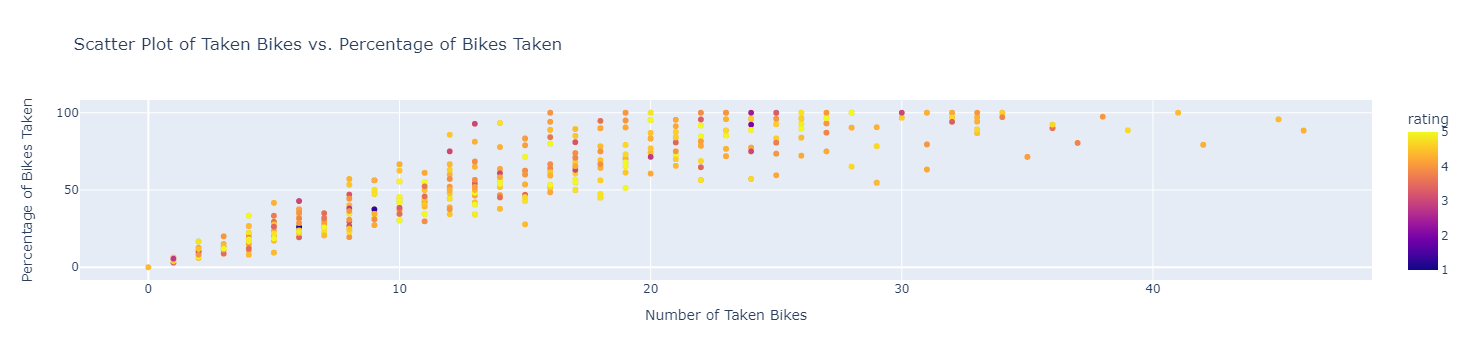

In [89]:
'''
SCATTER PLOT OF TAKEN BIKES VS PERCENTAGE OF BIKES TAKEN (COLOR RATING)
'''
fig = px.scatter(sample_merged_df, 
                 x='taken_bikes', 
                 y='percentage_bikes_taken', 
                 color='rating',  # color by poi
                 title='Scatter Plot of Taken Bikes vs. Percentage of Bikes Taken',
                 labels={'taken_bikes': 'Number of Taken Bikes', 'percentage_bikes_taken': 'Percentage of Bikes Taken'},
                 hover_data=['available_bikes', 'rating'])  

fig.show()

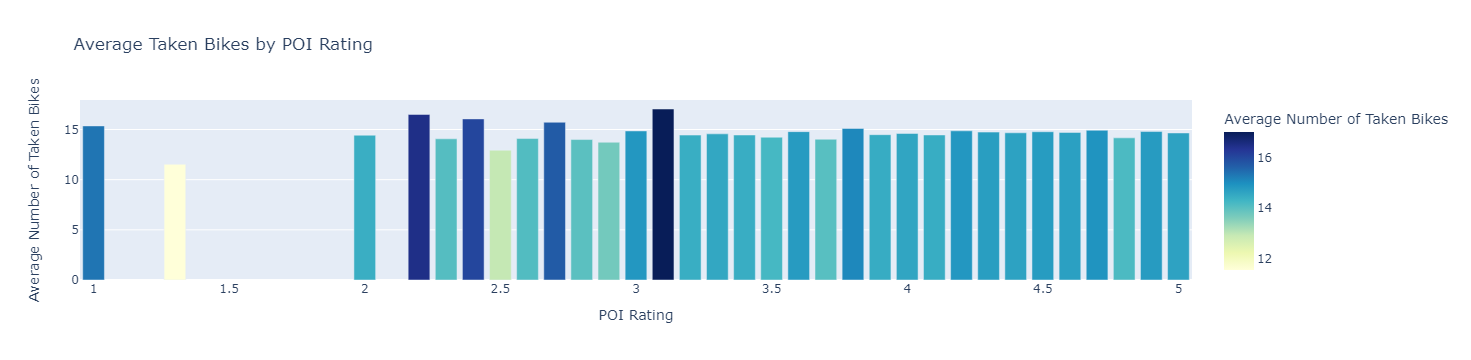

In [90]:
'''
BAR CHART OF AVERAGE TAKEN BIKES BY POI RATING
'''

avg_taken_bikes = sample_merged_df.groupby('rating')['taken_bikes'].mean().reset_index()

fig = px.bar(avg_taken_bikes, 
              x='rating', 
              y='taken_bikes', 
              title='Average Taken Bikes by POI Rating',
              labels={'taken_bikes': 'Average Number of Taken Bikes', 'rating': 'POI Rating'},
              color='taken_bikes',  # color by the number of taken bikes
              color_continuous_scale='YlGnBu')

fig.show()

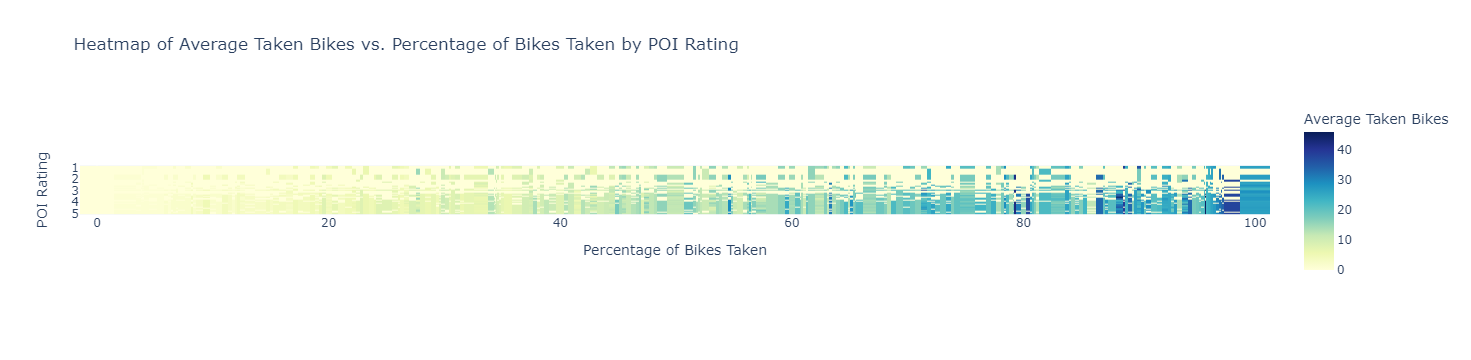

In [91]:
'''
HEATMAP OF AVERAGE TAKEN BIKES VS PERCENTAGE OF BIKES TAKEN BY POI RATING
'''

heatmap_data = sample_merged_df.pivot_table(index='rating', 
                                             values='taken_bikes', 
                                             columns='percentage_bikes_taken', 
                                             aggfunc='mean').fillna(0)

heatmap_data = heatmap_data.reset_index()

fig = px.imshow(heatmap_data.iloc[:, 1:], 
                labels=dict(x='Percentage of Bikes Taken', y='POI Rating', color='Average Taken Bikes'),
                x=heatmap_data.columns[1:], 
                y=heatmap_data['rating'],  
                color_continuous_scale='YlGnBu',
                title='Heatmap of Average Taken Bikes vs. Percentage of Bikes Taken by POI Rating')

fig.show()

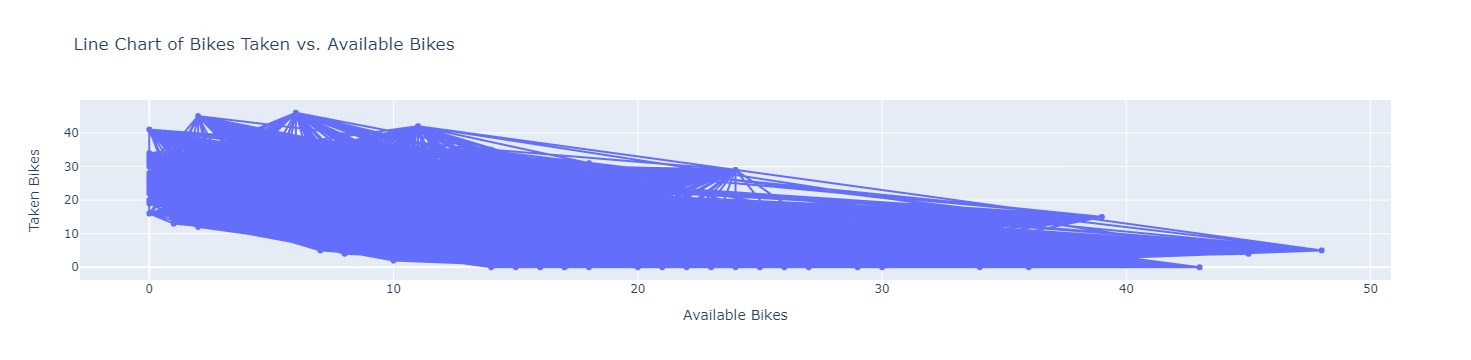

In [92]:
'''
LINE CHART OF BIKES TAKEN VS AVAILABLE BIKES
'''

fig = px.line(sample_merged_df, 
               x='available_bikes', 
               y='taken_bikes', 
               title='Line Chart of Bikes Taken vs. Available Bikes',
               labels={'available_bikes': 'Available Bikes', 'taken_bikes': 'Taken Bikes'},
               markers=True)

fig.show()

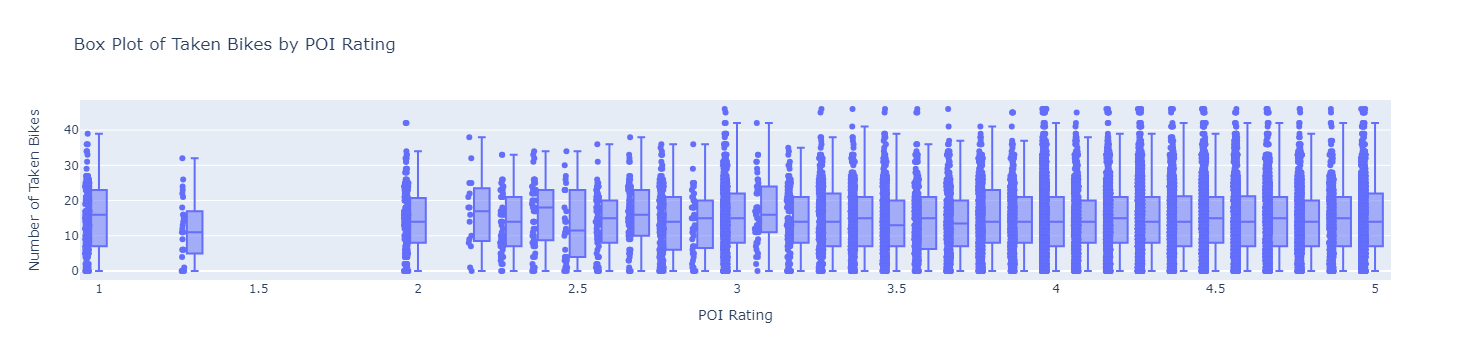

In [93]:
"""
BOX PLOT OF TAKEN BIKES BY POI RATING
"""
fig = px.box(sample_merged_df, 
              x='rating', 
              y='taken_bikes', 
              title='Box Plot of Taken Bikes by POI Rating',
              labels={'taken_bikes': 'Number of Taken Bikes', 'rating': 'POI Rating'},
              points='all') 

fig.show()

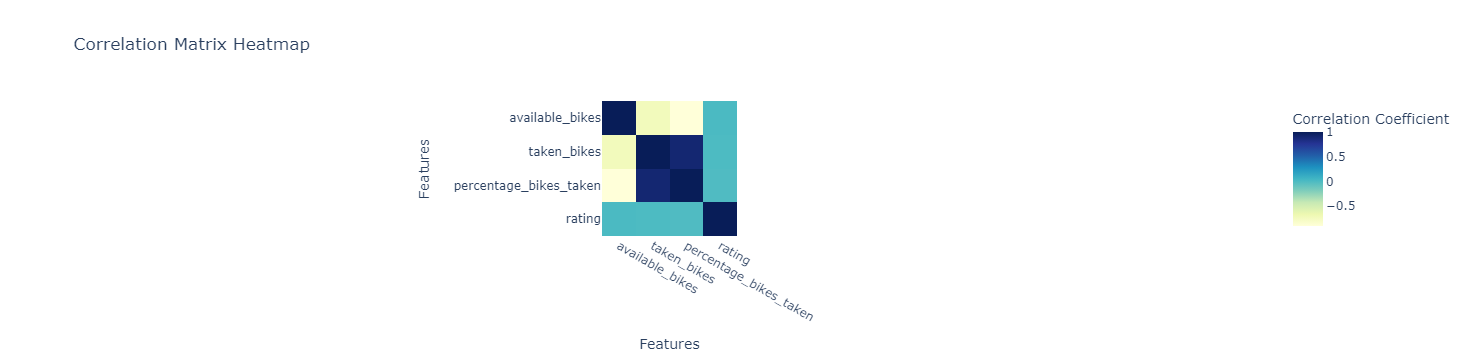

In [94]:
"""
CORRELATION MATRIX HEATMAP
"""
correlation_matrix = sample_merged_df[['available_bikes', 'taken_bikes', 'percentage_bikes_taken', 'rating']].corr()

fig = px.imshow(correlation_matrix, 
                labels=dict(x='Features', y='Features', color='Correlation Coefficient'),
                x=correlation_matrix.columns, 
                y=correlation_matrix.index,
                color_continuous_scale='YlGnBu',
                title='Correlation Matrix Heatmap')

fig.show()

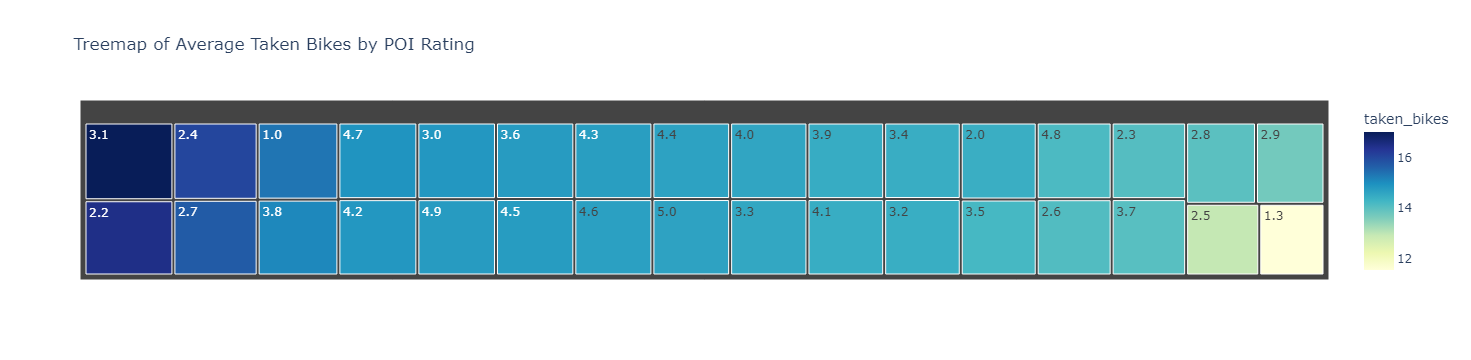

In [95]:
"""
TREEMAP OF POI RATINGS AND AVERAGE TAKEN BIKES
"""
avg_taken_bikes_by_rating = sample_merged_df.groupby('rating')['taken_bikes'].mean().reset_index()

fig = px.treemap(avg_taken_bikes_by_rating,
                 path=['rating'],
                 values='taken_bikes',
                 title='Treemap of Average Taken Bikes by POI Rating',
                 color='taken_bikes',  
                 color_continuous_scale='YlGnBu')

fig.show()

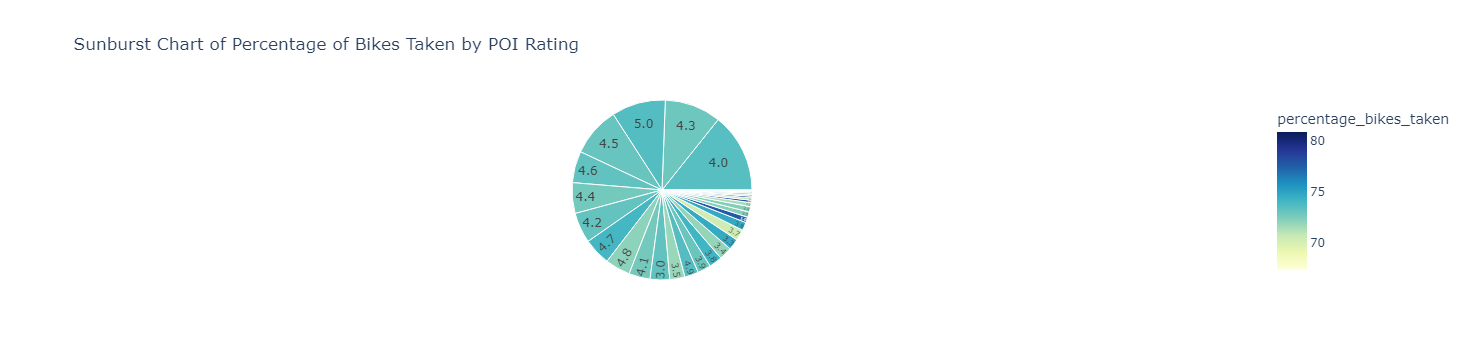

In [96]:
'''
SUNBURST CHART OF POI RATINGS AND PERCENTAGE OF BIKES TAKEN
'''

fig = px.sunburst(sample_merged_df,
                  path=['rating'], 
                  values='percentage_bikes_taken',
                  title='Sunburst Chart of Percentage of Bikes Taken by POI Rating',
                  color='percentage_bikes_taken',
                  color_continuous_scale='YlGnBu')

fig.show()

No correlation or relationships seem to occur between bikes taken/available and POI rating. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [97]:
# defining path to data folder and name of database
merged_db_path = os.path.join('../data', 'final_merged_dataset.db')

# creating connection to database
conn = sqlite3.connect(merged_db_path)

# saving the dataframe to sqlite db as a new table
final_merged_df.to_sql('final_merged', conn, if_exists='replace', index=False)

# commiting changes and closing connection
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [102]:
# defining path to database
db_path = '../data/final_merged_dataset.db'

# creating connection database
conn = sqlite3.connect(db_path)

# querying first 5 values 
query = "SELECT * FROM final_merged LIMIT 5;"

# executing query and placing in dataframe
head_df = pd.read_sql_query(query, conn)

# displaying dataframe
head_df

id                                              alias  \
0  peGMNEAPUxOR4Trg15eVdA               le-bouquet-l-hospitalet-de-llobregat   
1  0_UULyMycCwHIqK0avhvxg  el-xiringuito-de-bellvitge-l-hospitalet-de-llo...   
2  C65Z0hoJWndFHilQx6RxXw              bar-can-galan-hospitalet-de-llobregat   
3  Ldwla3RbG0qq4UW4yVZm6w                  la-marina-hospitalet-de-llobregat   
4  60GlRETCW6AXCS6d4gWQUA                  da-fu-hau-hospitalet-de-llobregat   

                         name  review_count  \
0                  Le Bouquet             3   
1  El Xiringuito de Bellvitge             3   
2               Bar Can Galan             5   
3                   La Marina             2   
4                   Da Fu Hau             2   

                                          categories  rating    distance  \
0  [{'alias': 'diners', 'title': 'Diners'}, {'ali...     4.3  125.860014   
1        [{'alias': 'tapas', 'title': 'Tapas Bars'}]     4.7  260.177995   
2         [{'alias': 'catalan', 'title': 'Catalan'}]     3.6  538.887813   
3  [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     4.0  852.140714   
4         [{'alias': 'chinese', 'title': 'Chinese'}]     4.0  763.947944   

                                      business_hours   latitude  longitude  \
0  [{'open': [{'is_overnight': False, 'start': '1...  41.347849   2.108678   
1                                                 []  41.348536   2.111207   
2                                                 []  41.350411   2.113510   
3  [{'open': [{'is_overnight': False, 'start': '0...  41.339224   2.107411   
4                                                 []  41.353330   2.106090   

   ...                           location.display_address price  \
0  ...  ['Hotel Hesperia Tower', 'Gran Vía, 144', "089...  None   
1  ...  ['Rambla de la Marina, s/n', "08901 L'Hospital...     €   
2  ...  ['Avinguda America, 37', '08907 Hospitalet de ...     €   
3  ...  ['Carrer de la Feixa Llarga, 47', '08907 Hospi...  None   
4  ...  ['Rambla Marina, 353', '08907 Hospitalet De Ll...     €   

  bike_station_lat  bike_station_lon       city country available_bikes  \
0         41.40552          2.162255  Barcelona      ES               6   
1         41.40552          2.162255  Barcelona      ES               6   
2         41.40552          2.162255  Barcelona      ES               6   
3         41.40552          2.162255  Barcelona      ES               6   
4         41.40552          2.162255  Barcelona      ES               6   

   taken_bikes  total_bikes percentage_bikes_taken  
0           10           16                   62.5  
1           10           16                   62.5  
2           10           16                   62.5  
3           10           16                   62.5  
4           10           16                   62.5  

[5 rows x 25 columns]

In [104]:
# closing connection
conn.close()

# head of dataframe to see if it matches
final_merged_df.head()

id                                              alias  \
0  peGMNEAPUxOR4Trg15eVdA               le-bouquet-l-hospitalet-de-llobregat   
1  0_UULyMycCwHIqK0avhvxg  el-xiringuito-de-bellvitge-l-hospitalet-de-llo...   
2  C65Z0hoJWndFHilQx6RxXw              bar-can-galan-hospitalet-de-llobregat   
3  Ldwla3RbG0qq4UW4yVZm6w                  la-marina-hospitalet-de-llobregat   
4  60GlRETCW6AXCS6d4gWQUA                  da-fu-hau-hospitalet-de-llobregat   

                         name  review_count  \
0                  Le Bouquet             3   
1  El Xiringuito de Bellvitge             3   
2               Bar Can Galan             5   
3                   La Marina             2   
4                   Da Fu Hau             2   

                                          categories  rating    distance  \
0  [{'alias': 'diners', 'title': 'Diners'}, {'ali...     4.3  125.860014   
1        [{'alias': 'tapas', 'title': 'Tapas Bars'}]     4.7  260.177995   
2         [{'alias': 'catalan', 'title': 'Catalan'}]     3.6  538.887813   
3  [{'alias': 'spanish', 'title': 'Spanish'}, {'a...     4.0  852.140714   
4         [{'alias': 'chinese', 'title': 'Chinese'}]     4.0  763.947944   

                                      business_hours   latitude  longitude  \
0  [{'open': [{'is_overnight': False, 'start': '1...  41.347849   2.108678   
1                                                 []  41.348536   2.111207   
2                                                 []  41.350411   2.113510   
3  [{'open': [{'is_overnight': False, 'start': '0...  41.339224   2.107411   
4                                                 []  41.353330   2.106090   

   ...                           location.display_address price  \
0  ...  ['Hotel Hesperia Tower', 'Gran Vía, 144', "089...   NaN   
1  ...  ['Rambla de la Marina, s/n', "08901 L'Hospital...     €   
2  ...  ['Avinguda America, 37', '08907 Hospitalet de ...     €   
3  ...  ['Carrer de la Feixa Llarga, 47', '08907 Hospi...   NaN   
4  ...  ['Rambla Marina, 353', '08907 Hospitalet De Ll...     €   

  bike_station_lat  bike_station_lon       city country available_bikes  \
0         41.40552          2.162255  Barcelona      ES               6   
1         41.40552          2.162255  Barcelona      ES               6   
2         41.40552          2.162255  Barcelona      ES               6   
3         41.40552          2.162255  Barcelona      ES               6   
4         41.40552          2.162255  Barcelona      ES               6   

   taken_bikes  total_bikes percentage_bikes_taken  
0           10           16                   62.5  
1           10           16                   62.5  
2           10           16                   62.5  
3           10           16                   62.5  
4           10           16                   62.5  

[5 rows x 25 columns]